## Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
X_st = X.copy().astype(np.float64)

X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [4]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
print(X_st[2])
print(X_st[3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

### Домашние задания

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).  

In [6]:

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model_reg2(number, X, y, iterations, alpha=1e-4, lambda_=1e-8):
    spisok_1=[]
    spisok_2=[]
    spisok_iterations =[]
    spisok_w={}
    spisok_err={}
    dict_iterations ={}
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
            spisok_1.append(W+00000000000000000000000000000.1)
            spisok_2.append(err)
            spisok_iterations.append(i)
            #spisok_w.append(W)
            #spisok_err.append(err)
    spisok_w[number] = spisok_1
    spisok_err[number] = spisok_2
    dict_iterations[number] = spisok_iterations
    return spisok_w, spisok_err,  dict_iterations

In [7]:
weights_0 = eval_model_reg2(1,X_st, y, iterations=1000, alpha=1e-3, lambda_=1)
weights_1 = eval_model_reg2(2,X_st, y, iterations=1000, alpha=1e-3, lambda_=0.5)
weights_2 = eval_model_reg2(3,X_st, y, iterations=1000, alpha=1e-3, lambda_=0.1)
weights_3 = eval_model_reg2(4,X_st, y, iterations=1000, alpha=1e-3, lambda_=0.01)
weights_4 = eval_model_reg2(5,X_st, y, iterations=1000, alpha=1e-3, lambda_=0.001)

100 [9.80993069 1.22054394 1.78042744 2.49206743] 2348.4328825484267
200 [16.0477608   1.9263718   2.30117935  2.88923782] 1774.2934084413032
300 [20.2257507   2.31195634  2.53680057  3.02987949] 1438.5499182762746
400 [23.02409551  2.5362399   2.64028165  3.05953761] 1234.901775611957
500 [24.8983781   2.67604267  2.68309981  3.04458044] 1107.885038068684
600 [26.15373991  2.76919542  2.69854137  3.01461854] 1026.993015974267
700 [26.99455937  2.83487146  2.70201966  2.98232867] 974.683495100721
800 [27.55772559  2.8832008   2.70060006  2.95269149] 940.4853721020627
900 [27.93492451  2.91984007  2.69746229  2.927275  ] 917.9552678981916
1000 [28.18756577  2.94816356  2.69398839  2.90620374] 903.0326878776153
100 [10.29861135  1.25580814  1.87819732  2.66422596] 2299.575796080072
200 [17.55676193  2.03076216  2.50320244  3.21857458] 1647.6955848061516
300 [22.93130819  2.47832608  2.81542955  3.47300307] 1240.0279785233447
400 [26.9110751   2.75061786  2.96663761  3.5758511 ] 977.77392

В модедели L2 зависимость весов признаков от альфы падает при значении лямбды от 0.01. Чем
выше значение лямбды, тем выше ошибка mse при итерациях и меньше размер весов


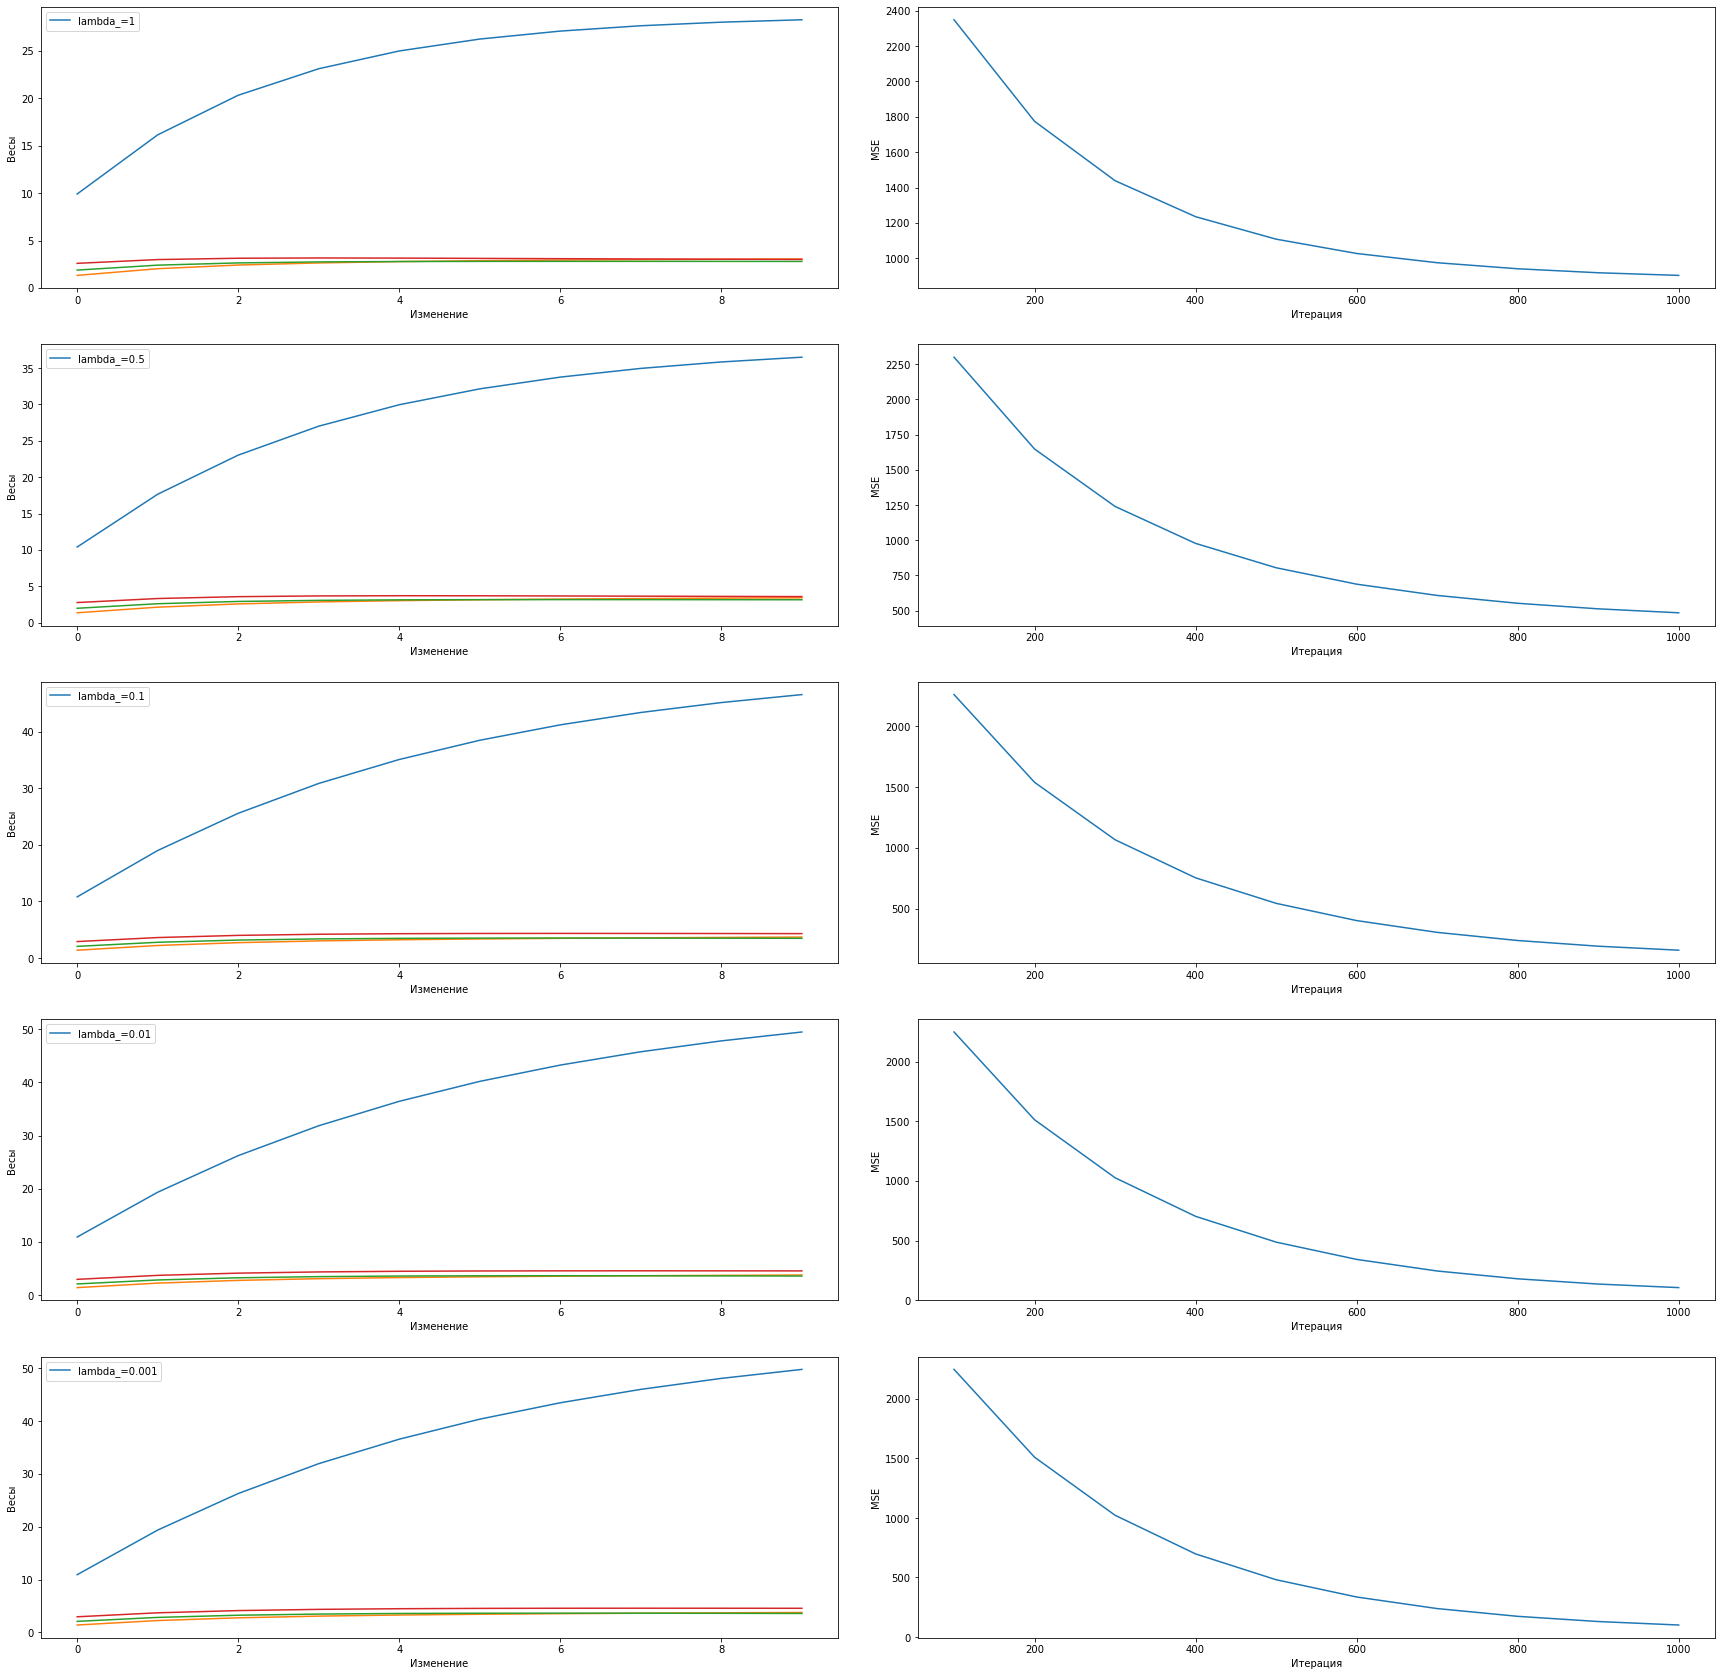

In [8]:
from pylab import rcParams

fig, ax = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(30, 30)
fig.subplots_adjust(wspace=0.1)
rcParams["figure.figsize"] = 20,20

ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10 = ax.flatten()

ax1.plot(weights_0[0].get(1))
ax2.plot(weights_0[2].get(1),weights_0[1].get(1))
ax1.legend(labels=["lambda_=1"])
ax1.set_xlabel("Изменение")
ax1.set_ylabel("Весы")
#ax1.set_yscale(value="log")

ax2.set_xlabel("Итерация")
ax2.set_ylabel("MSE")

ax3.plot(weights_1[0].get(2))
ax4.plot(weights_1[2].get(2), weights_1[1].get(2))
ax3.legend(labels=["lambda_=0.5"])
ax3.set_xlabel("Изменение")
ax3.set_ylabel("Весы")
#ax3.set_yscale(value="log")

ax4.set_xlabel("Итерация")
ax4.set_ylabel("MSE")

ax5.plot(weights_2[0].get(3))
ax6.plot(weights_2[2].get(3),weights_2[1].get(3))
ax5.legend(labels=["lambda_=0.1"])
ax5.set_xlabel("Изменение")
ax5.set_ylabel("Весы")
#ax5.set_yscale(value="log")

ax6.set_xlabel("Итерация")
ax6.set_ylabel("MSE")

ax7.plot(weights_3[0].get(4))
ax8.plot(weights_3[2].get(4), weights_3[1].get(4))
ax7.legend(labels=["lambda_=0.01"])
ax7.set_xlabel("Изменение")
ax7.set_ylabel("Весы")
#ax7.set_yscale(value="log")

ax8.set_xlabel("Итерация")
ax8.set_ylabel("MSE")

ax9.plot(weights_4[0].get(5))
ax10.plot(weights_4[2].get(5),weights_4[1].get(5))
ax9.legend(labels=["lambda_=0.001"])
ax9.set_xlabel("Изменение")
ax9.set_ylabel("Весы")
#ax9.set_yscale(value="log")

ax10.set_xlabel("Итерация")
ax10.set_ylabel("MSE")

print('''В модедели L2 зависимость весов признаков от альфы падает при значении лямбды от 0.01. Чем
выше значение лямбды, тем выше ошибка mse при итерациях и меньше размер весов''')

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

In [61]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [62]:
#Нормализация
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm[2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [63]:
#Стандартизация
X_st = X.copy().astype(np.float64)

X_st[2] = (X[2] - X[2].mean()) / X[2].std()
X_st[2]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [64]:
X_st[2].mean(), X_st[2].std()


(-4.163336342344337e-17, 0.9999999999999999)

In [67]:
# Стандартизация + нормализация
X_st[3] = (X_norm[2] - X_norm[2].mean()) / X_norm[2].std()
X_st[3]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [58]:
X_st[2].mean(), X_st[2].std()


(-1.1310397063368783e-16, 0.9999999999999999)

К одному и тому же признаку нельзя применить нормализацию и стандартизацию, только что-то одно. 
При  одновременном применении будет или нормализация или стандартизация


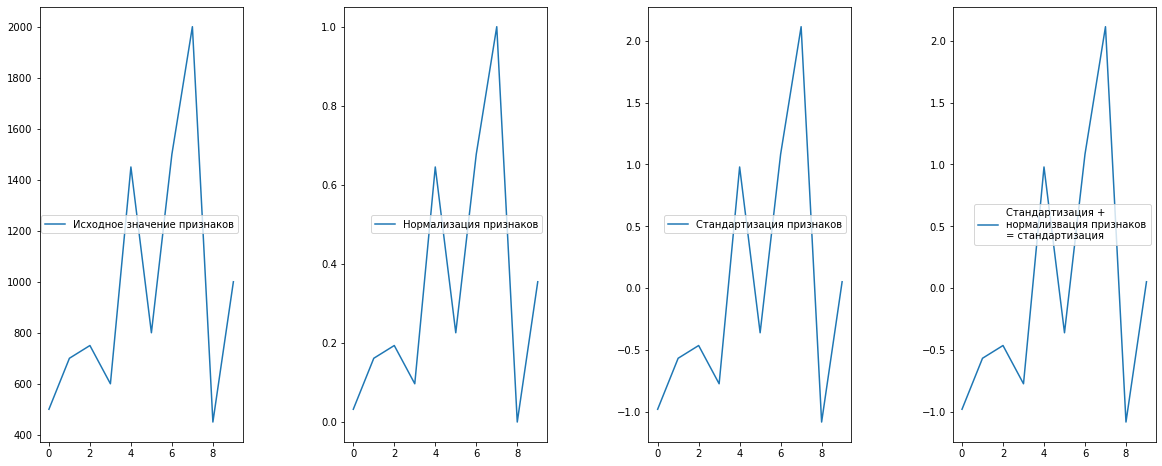

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.subplots_adjust(wspace=0.1)
rcParams["figure.figsize"] = 20,8
fig.subplots_adjust(wspace=0.5)
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.plot(X[2])
ax1.plot(X_norm[2])
ax2.plot(X_st[2])
ax3.plot(X_st[3])

ax0.legend(labels=["Исходное значение признаков"])
ax1.legend(labels=["Нормализация признаков"])
ax2.legend(labels=["Стандартизация признаков"])
ax3.legend(labels=['''Стандартизация +
нормализвация признаков
= стандартизация'''])
print('''К одному и тому же признаку нельзя применить нормализацию и стандартизацию, только что-то одно. 
При  одновременном применении будет или нормализация или стандартизация''')